# ERC-4626: all vaults on a particular chain

- In this notebook, we examine ERC-4626 vaults on a particular chain

## Usage

This is an open source notebook based on open data
- You can edit and remix this notebook yourself 

To do your own data research:

- Read general instructions [how to run the tutorials](./)
- See `ERC-4626: scanning vaults' historical price and performance` example in tutorials first how to build `vault-prices-1h.parquet` file.

For any questions, follow and contact [Trading Strategy community](https://tradingstrategy.ai/community).

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.vault.base import VaultSpec
from eth_defi.research.notebook import set_large_plotly_chart_font

# Fix X time axis bugs in Plotly charts
from eth_defi.monkeypatch import plotly

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

## Read and clean raw scanned vault price data

- Read the Parquet file produced earlier with price scan 
- Clean the data if necessary

In [2]:
import pickle
from pathlib import Path

from eth_defi.vault.vaultdb import VaultDatabase

data_folder = Path("~/.tradingstrategy/vaults").expanduser()

vault_db = VaultDatabase.read()

cleaned_data_parquet_file = data_folder / "cleaned-vault-prices-1h.parquet"
prices_df = pd.read_parquet(cleaned_data_parquet_file)

print(f"We have {len(vault_db):,} vaults in the database and {len(prices_df):,} price rows.")

We have 24,157 vaults in the database and 13,492,562 price rows.


## Choose chain to examine

- [See ChainList.org](https://chainlist.org/)

In [3]:
from eth_defi.vault.base import VaultSpec
from eth_defi.chain import get_chain_name

selected_chain_id = 42161  # Arbitrum
# selected_chain_id = 1  # Ethereum Mainnet
chain_name = get_chain_name(selected_chain_id)

print(f"Examining chain {chain_name} ({selected_chain_id})")


Examining chain Arbitrum (42161)


## Price data filtering

- Filter rices for our chains only

In [4]:

# last_sample_at = prices_df.index[-1]
# one_month_ago = last_sample_at - pd.DateOffset(months=1)

# PERIOD = [
#    one_month_ago,
#    last_sample_at,
#]
#
# mask = (prices_df.index >= PERIOD[0]) & (prices_df.index <= PERIOD[1])
prices_df = prices_df[prices_df["chain"] == selected_chain_id]
print(f"Examined prices contain {len(prices_df):,} price rows across all vaults on {chain_name}.")

prices_df.head(4)

Examined prices contain 2,974,427 price rows across all vaults on Arbitrum.


id  chain  \
timestamp                                                                      
2024-01-11 09:13:06  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-01-11 10:13:15  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-01-11 11:13:20  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   
2024-01-11 12:13:25  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   

                                                        address  block_number  \
timestamp                                                                       
2024-01-11 09:13:06  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169318721   
2024-01-11 10:13:15  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169333121   
2024-01-11 11:13:20  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169347521   
2024-01-11 12:13:25  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169361921   

                     share_price  total_assets  total_supply  performance_fee  \
timestamp                                                                       
2024-01-11 09:13:06         1.00          1.00          1.00              NaN   
2024-01-11 10:13:15         1.00          1.00          1.00              NaN   
2024-01-11 11:13:20         1.00          1.00          1.00              NaN   
2024-01-11 12:13:25         1.00          1.00          1.00              NaN   

                     management_fee errors                          name  \
timestamp                                                                  
2024-01-11 09:13:06             NaN         Staked USDA (Arbitrum) #6436   
2024-01-11 10:13:15             NaN         Staked USDA (Arbitrum) #6436   
2024-01-11 11:13:20             NaN         Staked USDA (Arbitrum) #6436   
2024-01-11 12:13:25             NaN         Staked USDA (Arbitrum) #6436   

                     event_count            protocol  raw_share_price  \
timestamp                                                               
2024-01-11 09:13:06       127177  <unknown ERC-4626>             1.00   
2024-01-11 10:13:15       127177  <unknown ERC-4626>             1.00   
2024-01-11 11:13:20       127177  <unknown ERC-4626>             1.00   
2024-01-11 12:13:25       127177  <unknown ERC-4626>             1.00   

                     returns_1h  avg_assets_by_vault  dynamic_tvl_threshold  \
timestamp                                                                     
2024-01-11 09:13:06        0.00                 1.00                   0.02   
2024-01-11 10:13:15        0.00                 1.00                   0.02   
2024-01-11 11:13:20        0.00                 1.00                   0.02   
2024-01-11 12:13:25        0.00                 1.00                   0.02   

                     tvl_filtering_mask  
timestamp                                
2024-01-11 09:13:06                True  
2024-01-11 10:13:15                True  
2024-01-11 11:13:20                True  
2024-01-11 12:13:25                True

## Filter vaults

- Choose vaults on our chain
- Filter out junk entries

In [5]:
min_tvl = 50_000

vault_db_chain = {spec: row for spec, row in vault_db.items() if spec.chain_id == selected_chain_id}
vault_db = {spec: row for spec, row in vault_db_chain.items() if (row["NAV"] or 0) >= min_tvl}
selected_vault_ids = {spec.as_string_id() for spec in vault_db.keys()}
prices_df = prices_df.loc[prices_df["id"].isin(selected_vault_ids)]

print(f"We have selectd {len(vault_db)} vaults out of total of {len(vault_db_chain):,} vaults on chain {chain_name}, having {len(prices_df):,} price rows.")

print("An example vault metadata:")
example_vault = next(iter(vault_db.values()))
display(pd.DataFrame(list(example_vault.items()), columns=["Key", "Value"]))

We have selectd 293 vaults out of total of 5,660 vaults on chain Arbitrum, having 717,251 price rows.
An example vault metadata:


Key                                              Value
0                Symbol                                             plvGLP
1                  Name                                   Plutus Vault GLP
2               Address         0x5326e71ff593ecc2cf7acae5fe57582d6e74cff1
3          Denomination                                             plsGLP
4                   NAV                          218852.566660400704649665
5              Protocol                                 <unknown ERC-4626>
6              Mgmt fee                                               None
7              Perf fee                                               None
8           Deposit fee                                               0.00
9          Withdraw fee                                               0.00
10               Shares                          157940.074220509572793378
11           First seen                                2022-08-26 11:27:33
12             Features                                                   
13              Lock up                                               None
14      _detection_data  ERC4262VaultDetection(chain=42161, address='0x...
15  _denomination_token  {'name': 'Plutus Staked GLP', 'symbol': 'plsGL...
16         _share_token  {'name': 'Plutus Vault GLP', 'symbol': 'plvGLP...

## Calculate vault lifetime metrics

- Calculate the DataFrame of life time metrics for each vault


In [6]:
from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics
from eth_defi.research.vault_metrics import format_lifetime_table

lifetime_data_df = calculate_lifetime_metrics(
    prices_df,
    vault_db,
)

print(f"Cleaning metrics for {len(lifetime_data_df):,} vaults")
lifetime_data_df = clean_lifetime_metrics(
    lifetime_data_df,
    max_annualised_return=0.99,  # 99% max return
)

print(f"Calculated lifetime metrics for {len(lifetime_data_df):,} vaults")

lifetime_data_df = lifetime_data_df.sort_values(["one_month_cagr"], ascending=False)

display(lifetime_data_df.head(2))

Calculating vault performance metrics:   0%|          | 0/129 [00:00<?, ?it/s]

Cleaning metrics for 129 vaults
Vault entries with too high NAV values filtered out: 1
Vault entries with too small ATH NAV values filtered out: 7
Vaults abnormally high returns: 5
Vault entries with too few deposit and redeem events (min 25) filtered out: 12
Calculated lifetime metrics for 103 vaults


/Users/moo/code/trade-executor/deps/web3-ethereum-defi/.venv/lib/python3.12/site-packages/tqdm/std.py:917: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name  lifetime_return  \
14  Silo Finance Borrowable USDC Deposit, SiloId: 151             0.00   
44                                 Plutus Hedge Token             0.16   

    lifetime_return_net  cagr  cagr_net  three_months_returns  \
14                  NaN  0.44       NaN                  0.00   
44                 0.14  0.21      0.19                  0.05   

    three_months_returns_net  three_months_cagr  three_months_cagr_net  \
14                       NaN               0.44                    NaN   
44                      0.04               0.21                   0.18   

    three_months_sharpe  three_months_sharpe_net  three_months_volatility  \
14                11.03                    11.03                     0.01   
44                 2.77                     2.77                     0.07   

    one_month_returns  one_month_returns_net  one_month_cagr  \
14               0.00                    NaN            0.44   
44               0.02                   0.02            0.25   

    one_month_cagr_net denomination     chain     peak_nav  current_nav  \
14                 NaN         USDC  Arbitrum 1,012,296.09 1,012,296.09   
44                0.22         USDC  Arbitrum   260,513.81   212,984.11   

    years  mgmt_fee  perf_fee  deposit_fee  withdraw_fee fee_label lockup  \
14   0.00       NaN       NaN         0.00          0.00     ? / ?    NaT   
44   0.77      0.00      0.12         0.00          0.00  0% / 12%    NaT   

    event_count            protocol                       risk  risk_numeric  \
14          577  <unknown ERC-4626>                       None           NaN   
44           76              Plutus  VaultTechnicalRisk.severe         40.00   

                                                  id          start_date  \
14  42161-0x1dc45c4451a99882fda13c98de8c940961875a92 2025-11-04 20:38:40   
44  42161-0x58bfc95a864e18e8f3041d2fcd3418f48393fe6a 2025-01-29 16:59:55   

              end_date                                     address  chain_id  \
14 2025-11-06 20:34:26  0x1dc45c4451a99882fda13c98de8c940961875a92     42161   
44 2025-11-06 20:34:26  0x58bfc95a864e18e8f3041d2fcd3418f48393fe6a     42161   

    stablecoinish     last_updated_at  last_updated_block       features  
14           True 2025-11-06 20:34:26           397515521             []  
44           True 2025-11-06 20:34:26           397515521  [plutus_like]

## Top vault list

- List top vaults on the chain, formatted for readability



In [7]:
from eth_defi.research.vault_metrics import format_lifetime_table

min_tvl = 25_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(["one_month_cagr"], ascending=False)

print(f"Vaults filtered by min TVL of ${min_tvl:,}, remaining {len(lifetime_data_filtered_df):,} vaults.")
formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
    add_address=True,
)

print(f"Last update {lifetime_data_filtered_df['last_updated_at'].max()}")

cols_to_move = ['Name', '1M return ann. (net / gross)']
other_cols = [col for col in formatted_df.columns if col not in cols_to_move]
formatted_df = formatted_df[cols_to_move + other_cols]

print(f"Formatted data for {len(formatted_df):,} vaults.")

# Script output
max_address_dump = 300
head = formatted_df.head(max_address_dump)
vault_count = min(max_address_dump, len(head))
print(f"Top {vault_count} vaults by 1 month annualised return are: {', '.join(head['Name'])}")
print(f"Top {vault_count} vaults by 1 month annualised return are:\n{', '.join(head['Address'])}")

display(formatted_df)


Vaults filtered by min TVL of $25,000, remaining 98 vaults.
Last update 2025-11-06 20:34:26
Formatted data for 97 vaults.
Top 97 vaults by 1 month annualised return are: Silo Finance Borrowable USDC Deposit, SiloId: 151, Plutus Hedge Token, gmUSDC, Harvest: USDC Vault (0x2d5F), Silo Finance Borrowable USDC Deposit, SiloId: 146, Gains Network USDC, Curve Vault for crvUSD, Silo Finance Borrowable USDC Deposit in ARB Silo, Staked USDai, Silo Finance Borrowable USDC Deposit, SiloId: 145, Clearstar High Yield USDC, Nashpoint DeFi & RWA Fund, USDC-2 yVault, Concrete USDC MultiSig Strategy, LazyVault_LowerRisk_USDC, USDn2, Gains Network DAI, Clearstar USDC Reactor, Tokemak arbUSD, Curve Vault for crvUSD, MEV Capital USDC, Yield Chasing Silo USDC, Yield Chasing crvUSD, autoSUSDai, Hyperithm USDC, Yield Chasing USDC, K3 Capital USDai USDC, Saving USX, Dolomite: USDC, Yearn Degen USDC, Gauntlet USDC Core, Dolomite: USDT, Euler Earn USDC, Prime Tether USD, Steakhouse High Yield USDC, Euler Arbitr

Name  \
#                                                       
1   Silo Finance Borrowable USDC Deposit, SiloId: 151   
2                                  Plutus Hedge Token   
3                                              gmUSDC   
4                        Harvest: USDC Vault (0x2d5F)   
5   Silo Finance Borrowable USDC Deposit, SiloId: 146   
6                                  Gains Network USDC   
7                              Curve Vault for crvUSD   
8    Silo Finance Borrowable USDC Deposit in ARB Silo   
9                                        Staked USDai   
10  Silo Finance Borrowable USDC Deposit, SiloId: 145   
11                          Clearstar High Yield USDC   
12                          Nashpoint DeFi & RWA Fund   
13                                      USDC-2 yVault   
14                    Concrete USDC MultiSig Strategy   
15                           LazyVault_LowerRisk_USDC   
16                                              USDn2   
17                                  Gains Network DAI   
18                             Clearstar USDC Reactor   
19                                     Tokemak arbUSD   
20                             Curve Vault for crvUSD   
21                                   MEV Capital USDC   
22                            Yield Chasing Silo USDC   
23                               Yield Chasing crvUSD   
24                                         autoSUSDai   
25                                     Hyperithm USDC   
26                                 Yield Chasing USDC   
27                              K3 Capital USDai USDC   
28                                         Saving USX   
29                                     Dolomite: USDC   
30                                   Yearn Degen USDC   
31                                 Gauntlet USDC Core   
32                                     Dolomite: USDT   
33                                    Euler Earn USDC   
34                                   Prime Tether USD   
35                         Steakhouse High Yield USDC   
36                          Euler Arbitrum Yield USDC   
37                                Euler Arbitrum USDC   
38                                        Staked USDX   
39                             K3 Capital USDai USDT0   
40                                 Frontier Theo USDC   
41                                   Spark USDC Vault   
42                              Steakhouse Prime USDC   
43                                             gmUSDC   
44                             Curve Vault for crvUSD   
45                               DAMM Stablecoin Fund   
46                         Wrapped Aave Arbitrum USDT   
47                          Static Aave Arbitrum USDT   
48                                    Fluid Gho Token   
49                 Peapods Interest Bearing USDC - 25   
50                                Gauntlet USDC Prime   
51                                        dForce USDC   
52                         Static Aave Arbitrum USDCn   
53                        Wrapped Aave Arbitrum USDCn   
54                   Crypto.com Defi Wallet AAVE USDT   
55                          Wrapped Aave Arbitrum GHO   
56               Crypto.com Defi Wallet Compound USDC   
57                           LazyVault_LowerRisk_USDT   
58                                     Fluid USD Coin   
59                    Concrete USDC MultiSig Strategy   
60                   Crypto.com Defi Wallet AAVE USDC   
61                         fija Strategy USDC AaveOpt   
62                                   Fluid Tether USD   
63                                        Staked EURA   
64                             Curve Vault for crvUSD   
65                                          autoUSDai   
66                             Curve Vault for crvUSD   
67                             Curve Vault for crvUSD   
68                                           MS-sUSDe   
69                                             HYPE++   
70

## Top vault equity curve comparison

- Compare top vault equity curves 
- Compare net returns 
- Only vaults with fee data included
- Lookback 90 days


In [8]:
# Untangled Finance share price verification hack manual. verification
#
# from plotly import express as px

# # Looks like Untangled Finance has a real bug in onchain data
# # Block 389264321
# # Address 0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9
# # Vault share price drops 1.05 -> 0.44
# # Our share price cleaning cannot fix this big gab
# # https://www.tdly.co/shared/simulation/5428843e-3ac1-4f3a-acef-11d5d84acade
# df = prices_df.loc[prices_df.id == "42161-0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9"]
# df = df[pd.Timestamp("2025-10-13"):pd.Timestamp("2025-10-15")]
# # display(df)

# fig = px.line(
#     df,
#     x=df.index,
#     y="share_price",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

# fig = px.line(
#     df,
#     x=df.index,
#     y="returns_1h",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

Skipping vault 42161-0x1dc45c4451a99882fda13c98de8c940961875a92: Silo Finance Borrowable USDC Deposit, SiloId: 151 due to missing fee data
Skipping vault 42161-0x4785df09013c1c492504fb4688ed3f320c964c9c: Concrete USDC MultiSig Strategy due to missing fee data
Skipping vault 42161-0x4f63cfea7458221cb3a0eee2f31f7424ad34bb58: LazyVault_LowerRisk_USDC due to missing fee data
Skipping vault 42161-0xacb7432a4bb15402ce2afe0a7c9d5b738604f6f9: Silo Finance Borrowable USDC Deposit, SiloId: 146 due to missing fee data
Skipping vault 42161-0xdc1ab820c92735e7a5e48f10fa3d8424ec47a93e: Silo Finance Borrowable USDC Deposit, SiloId: 145 due to missing fee data
Skipping vault 42161-0xe296ee7f83d1d95b3f7827ff1d08fe1e4cf09d8d: Curve Vault for crvUSD due to missing fee data


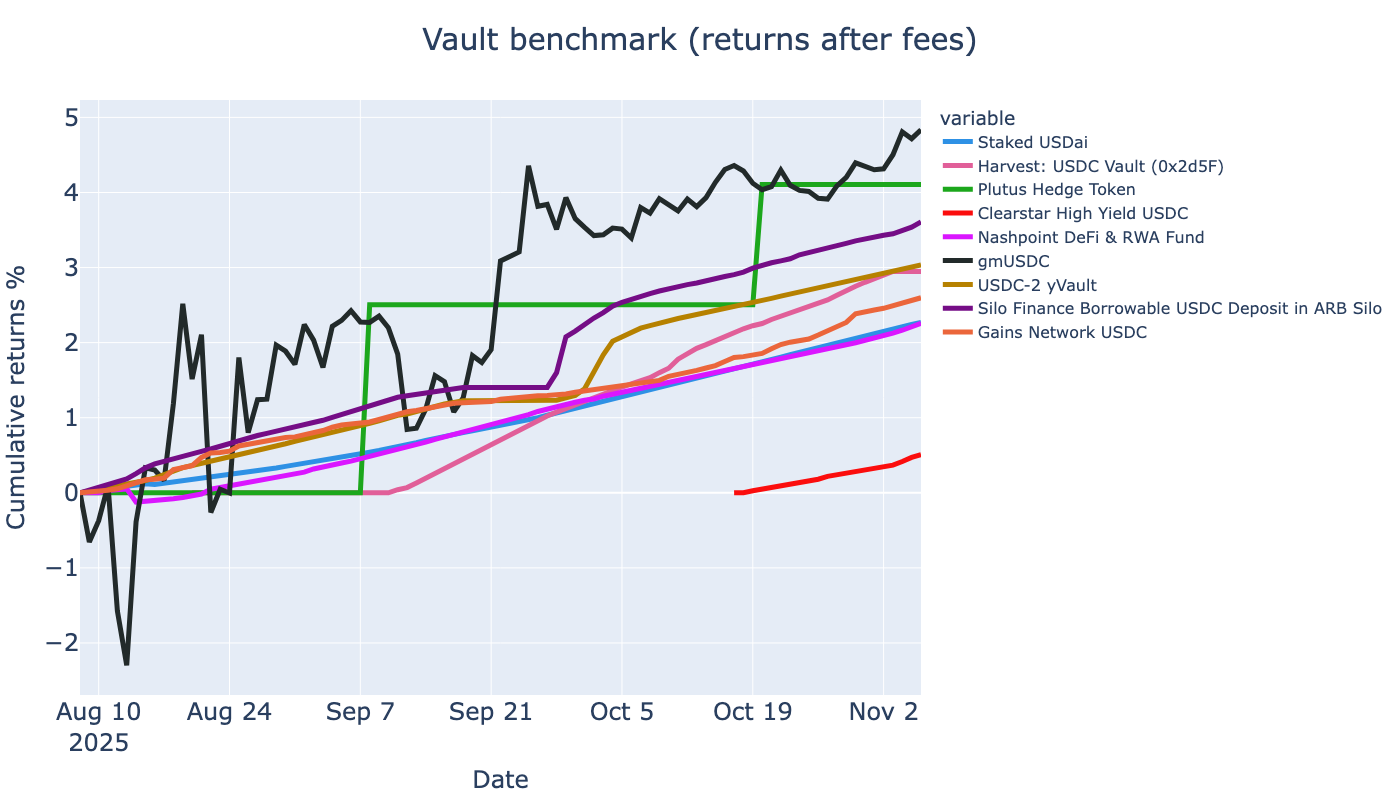

In [9]:
from eth_defi.research.vault_benchmark import visualise_vault_return_benchmark

top_count = 15

top_vaults_specs = lifetime_data_filtered_df.head(top_count)["id"].apply(VaultSpec.parse_string)

fig, net_returns_df = visualise_vault_return_benchmark(
    top_vaults_specs,
    prices_df=prices_df,
    vault_db=vault_db,
)

# display(net_returns_df)

fig.show()


## Top vaults correlation

- Check top vaults correlation matrix

In [10]:
# TODO

## Vault charts and performance tearsheets

- Show rolling returns performance chart for N top vaults

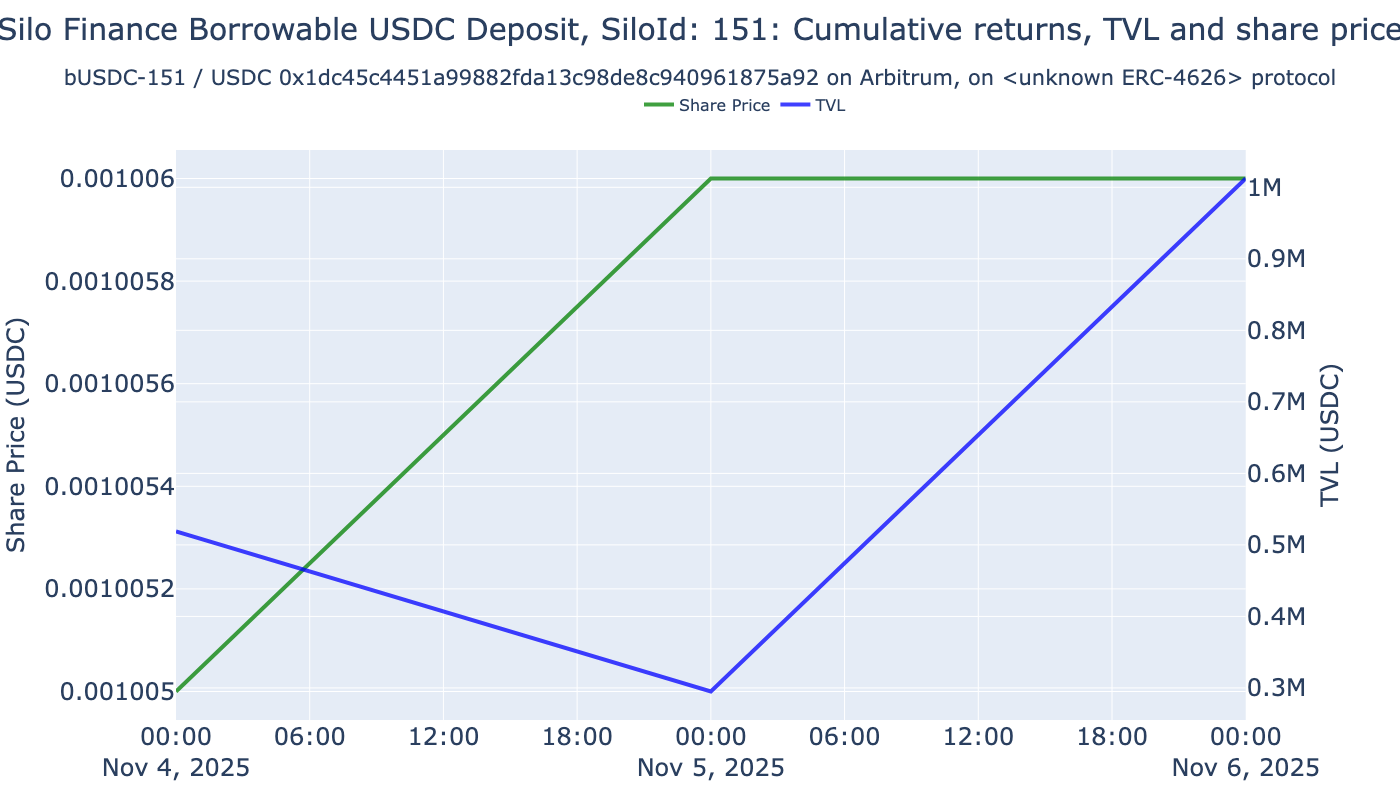

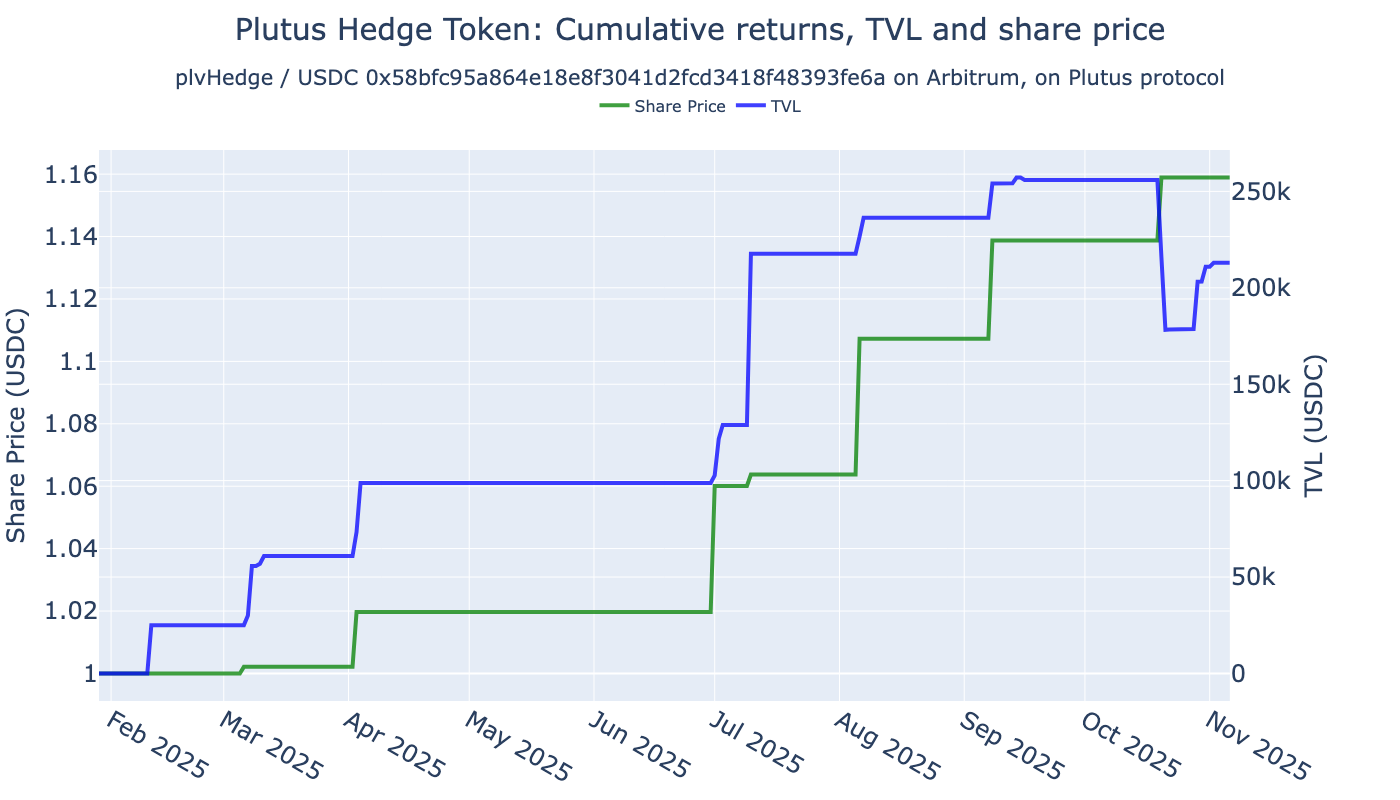

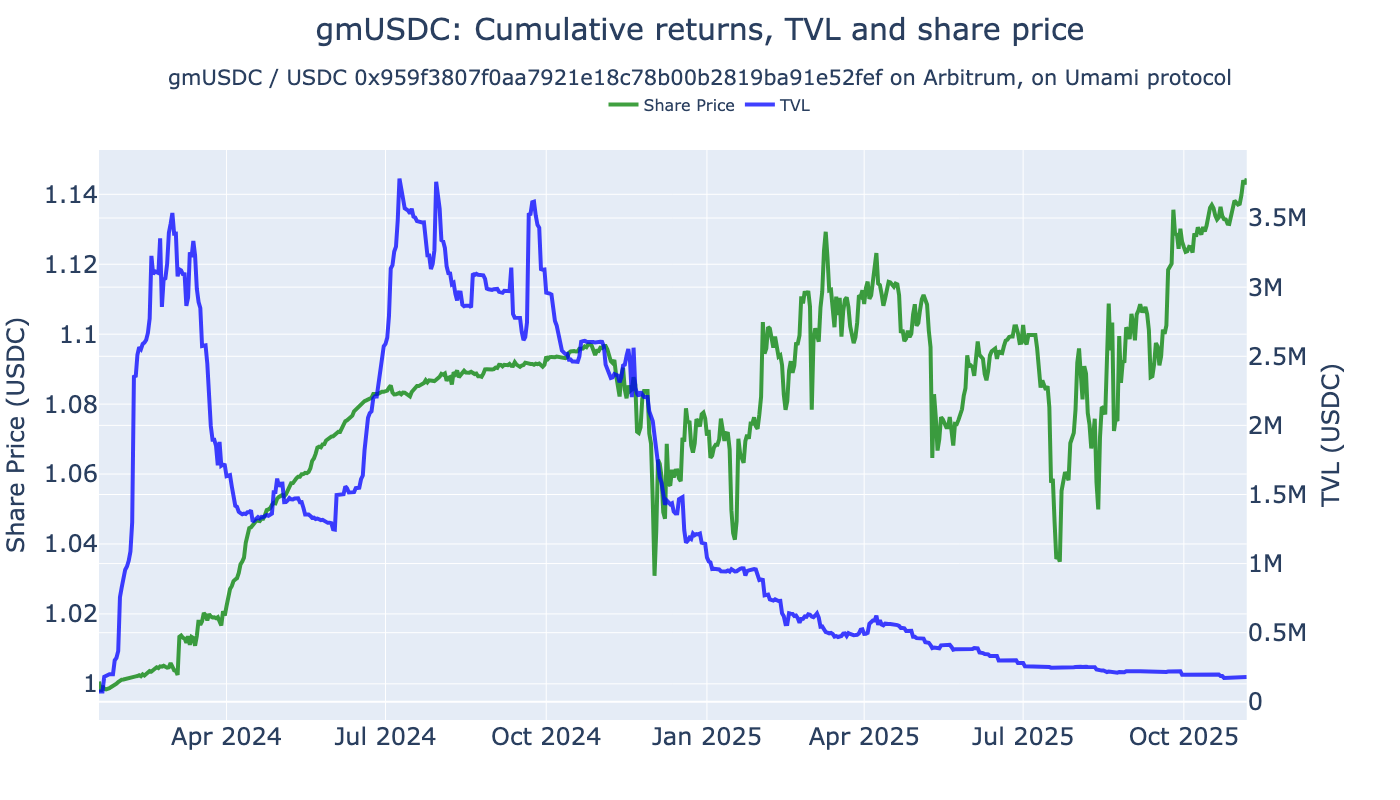

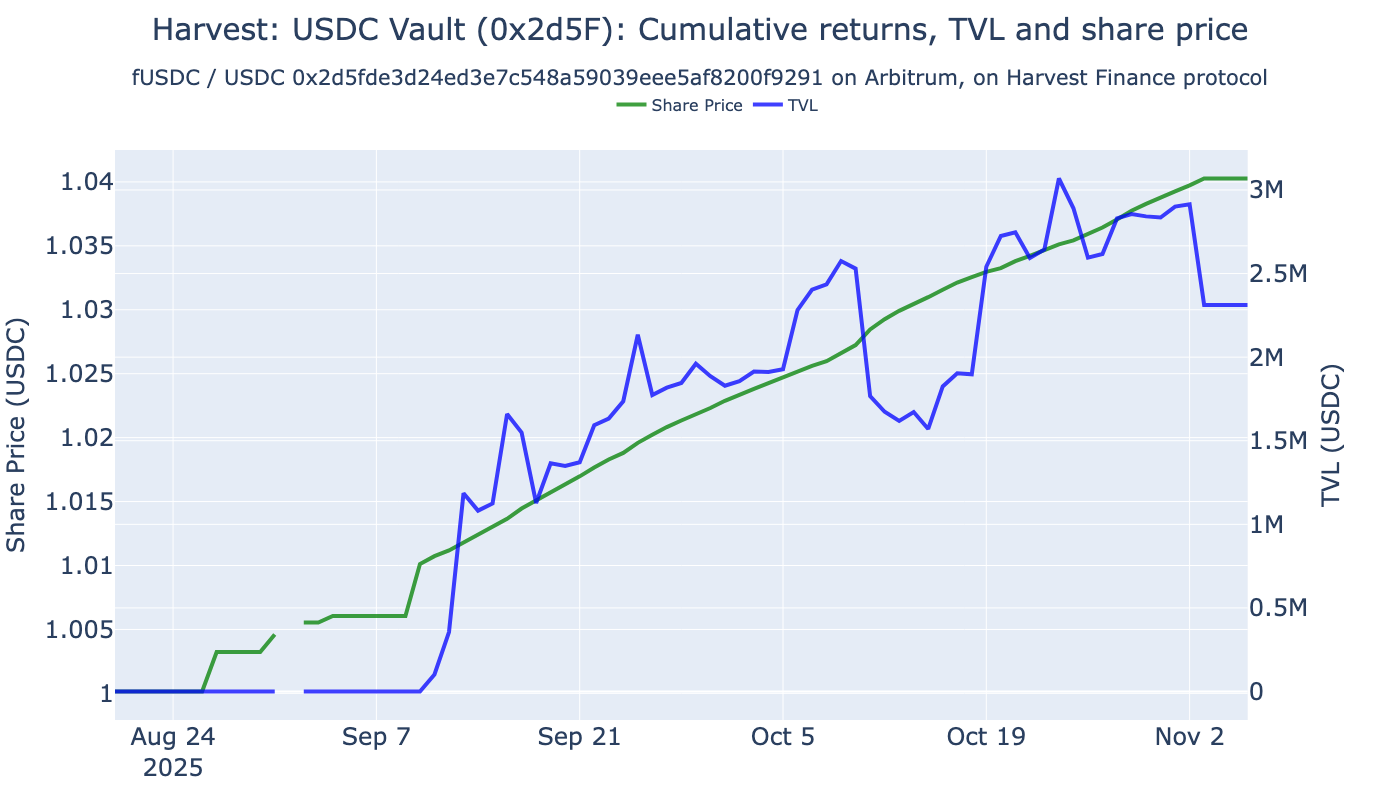

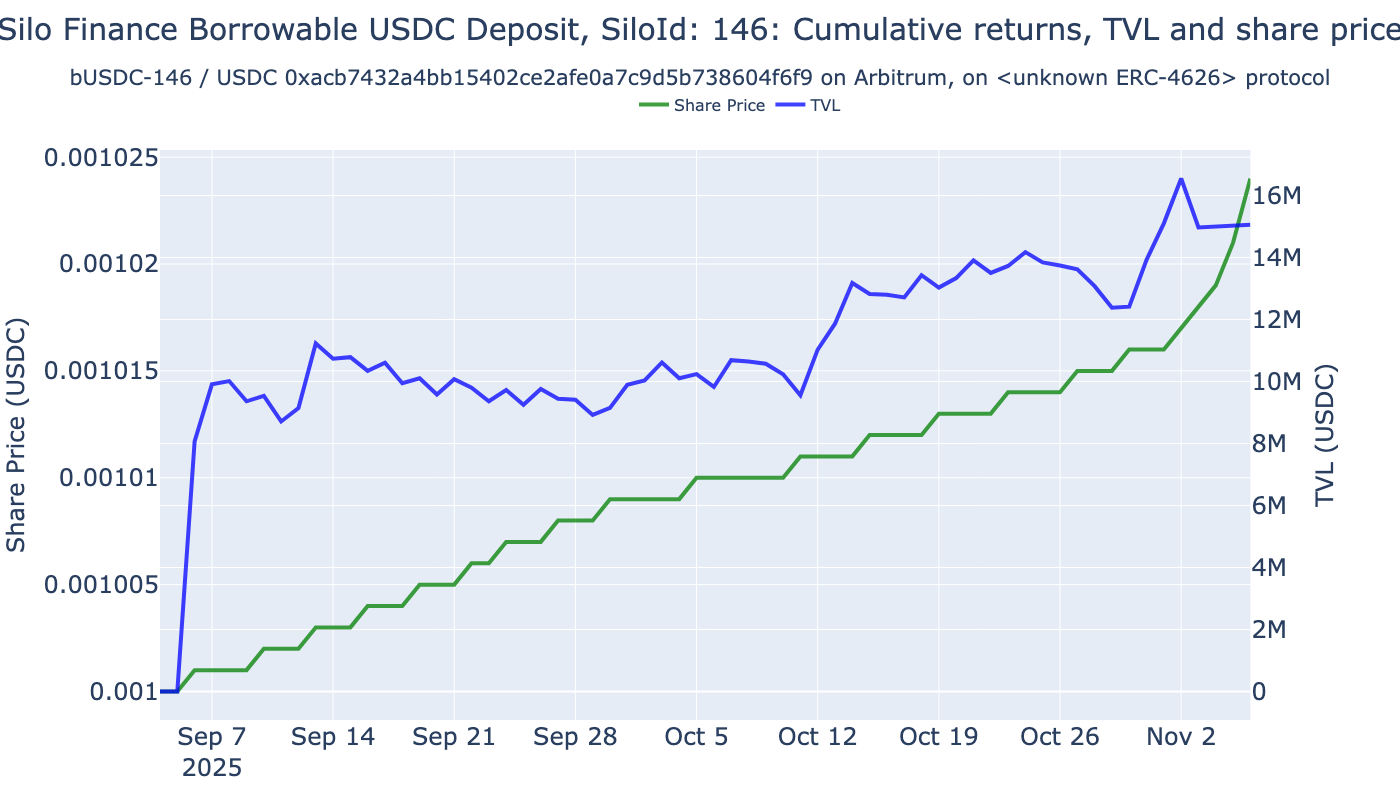

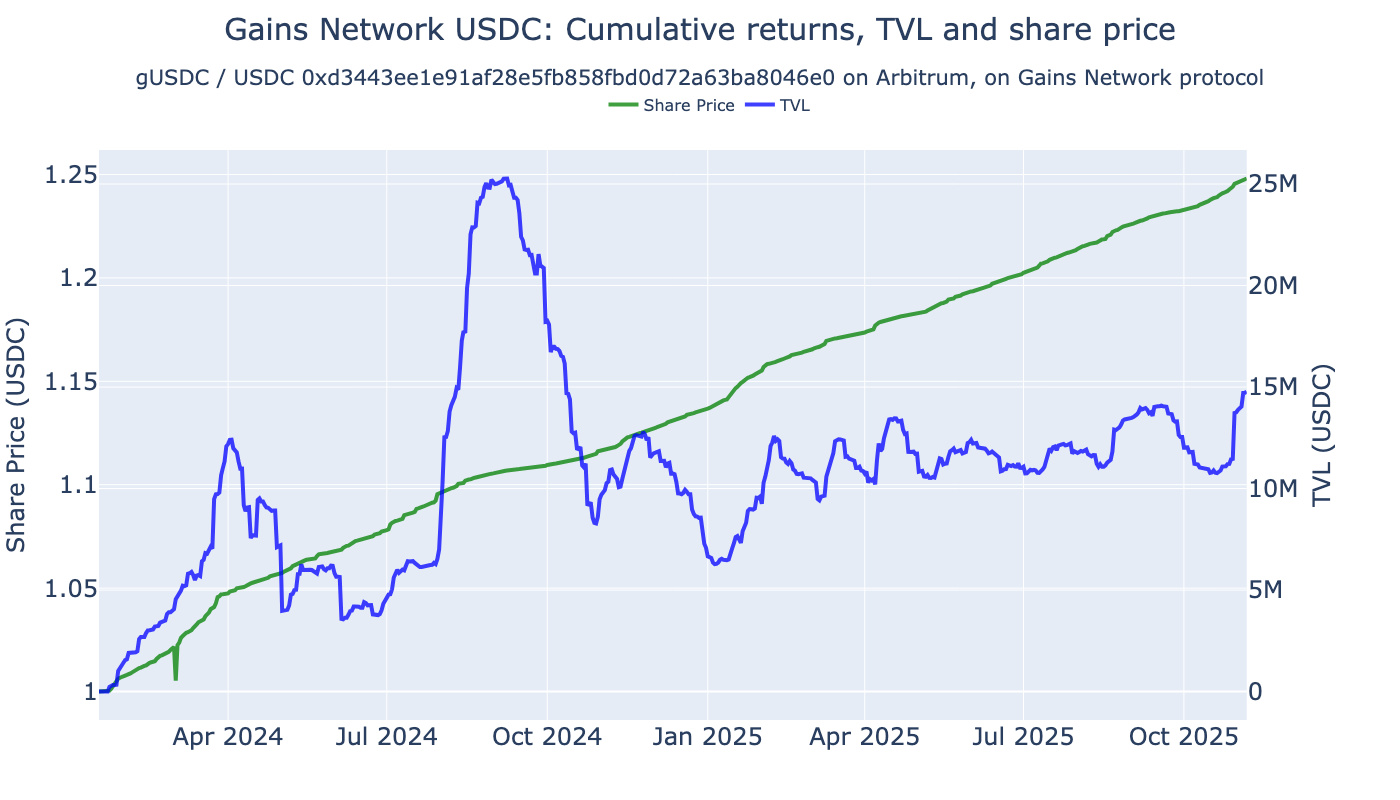

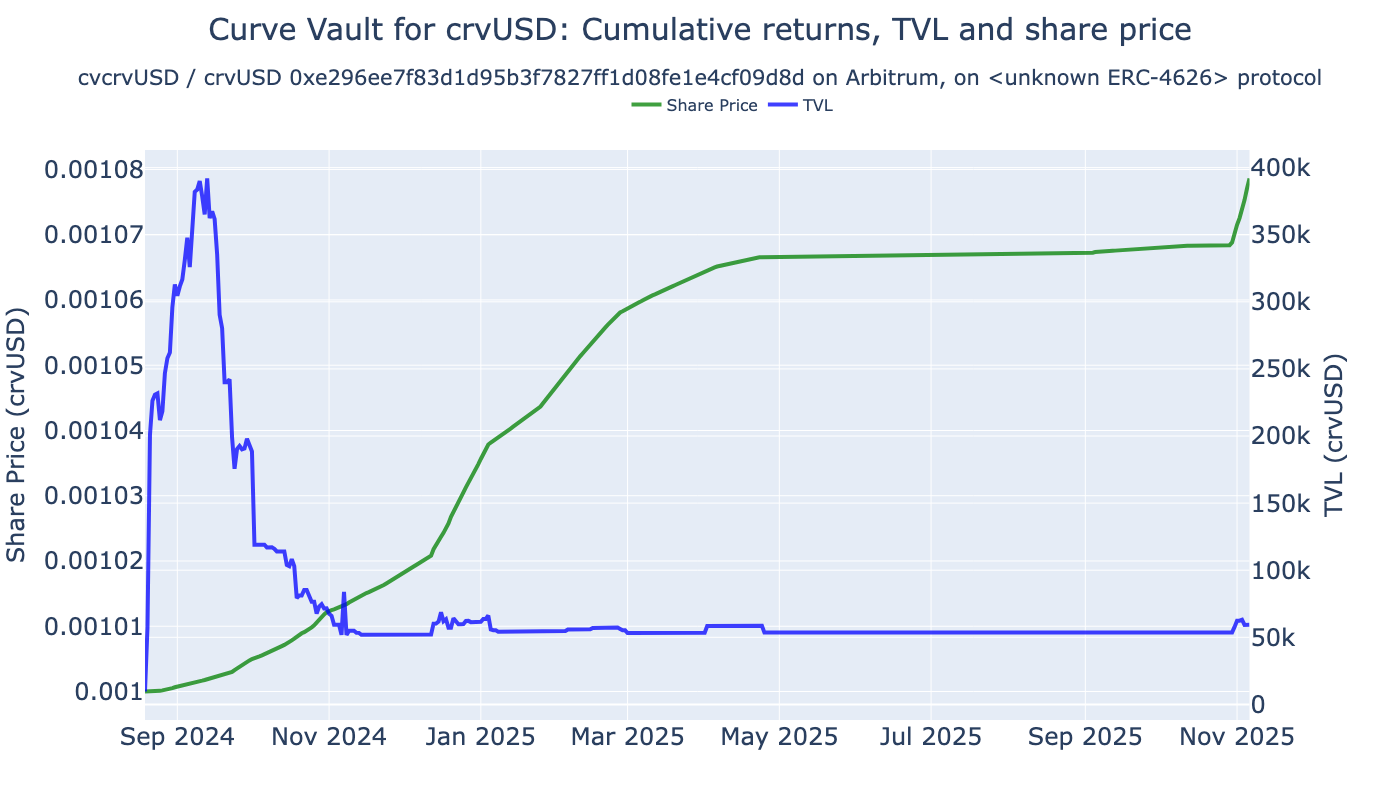

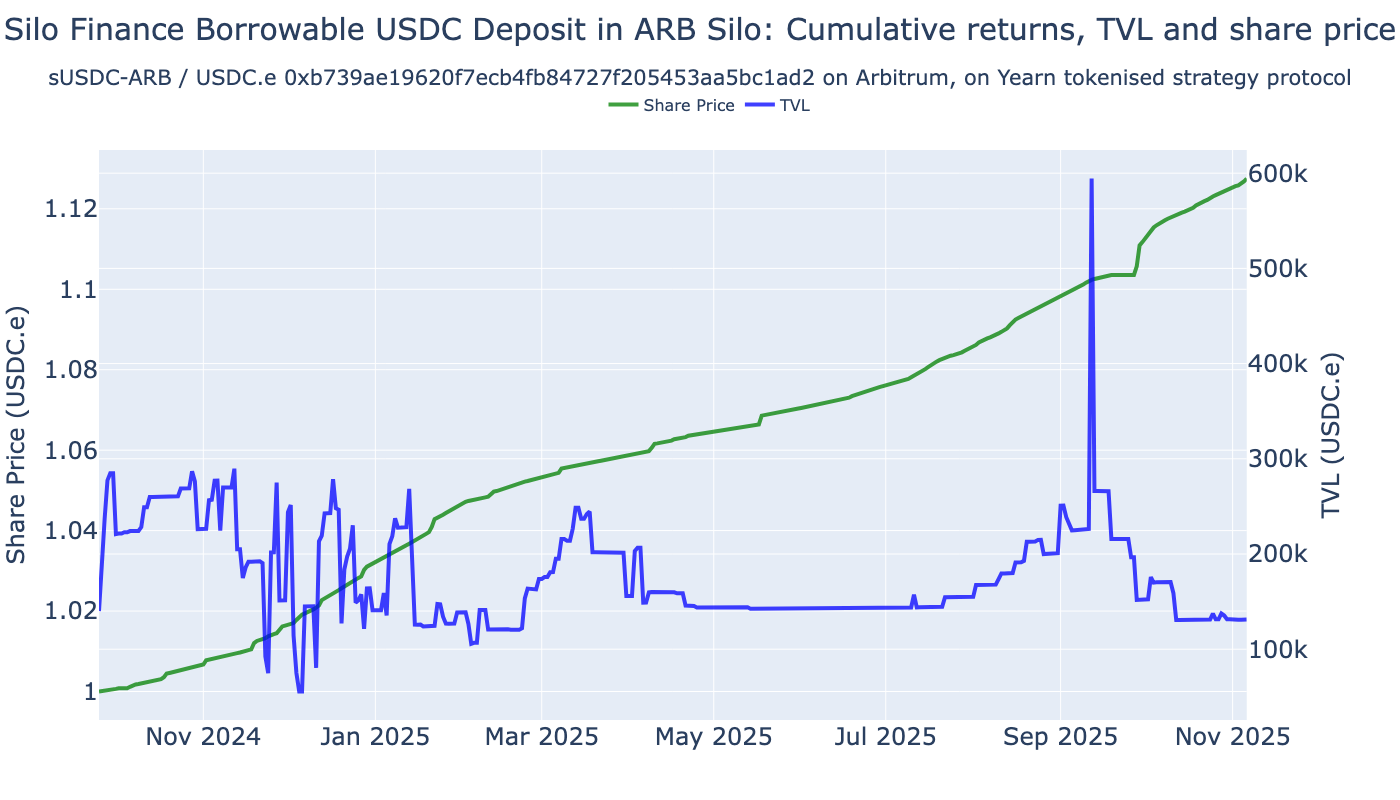

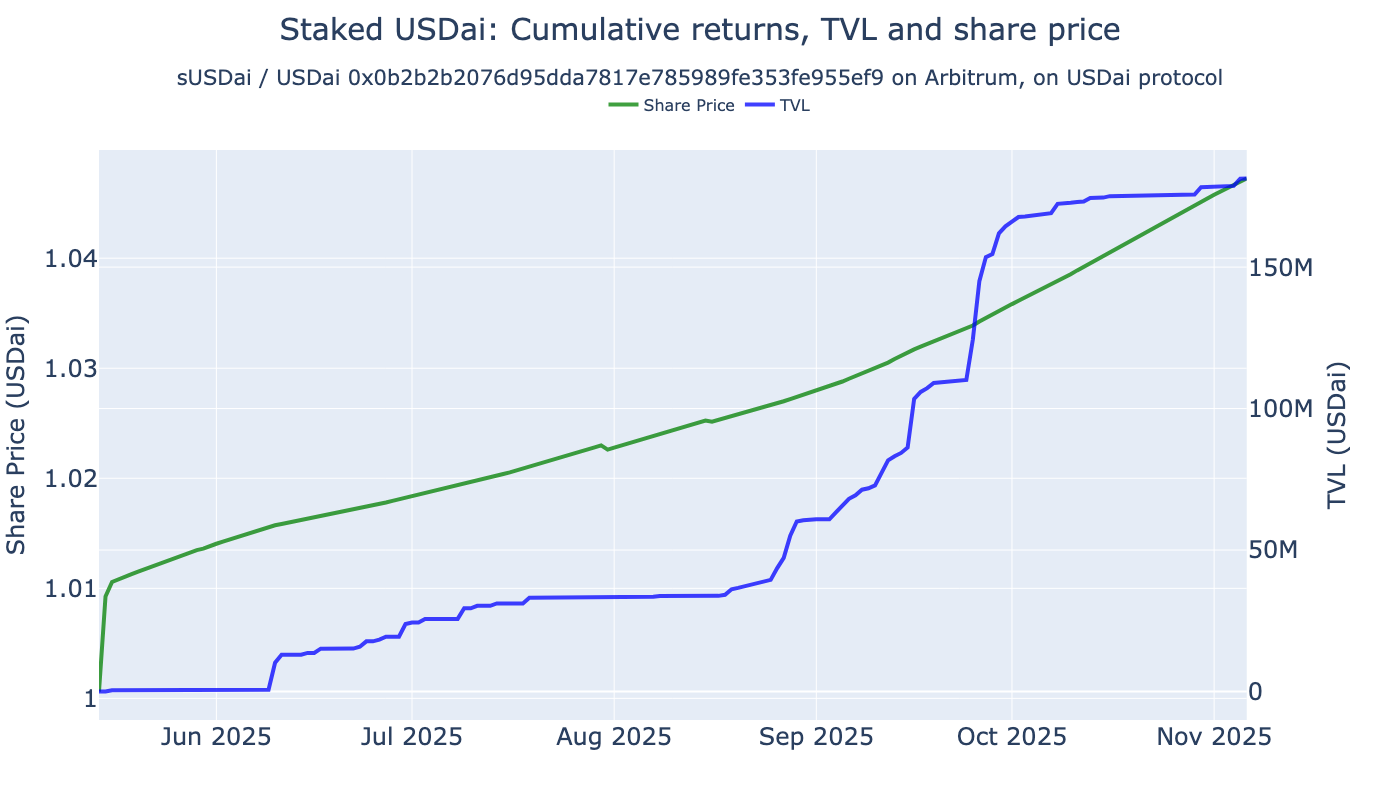

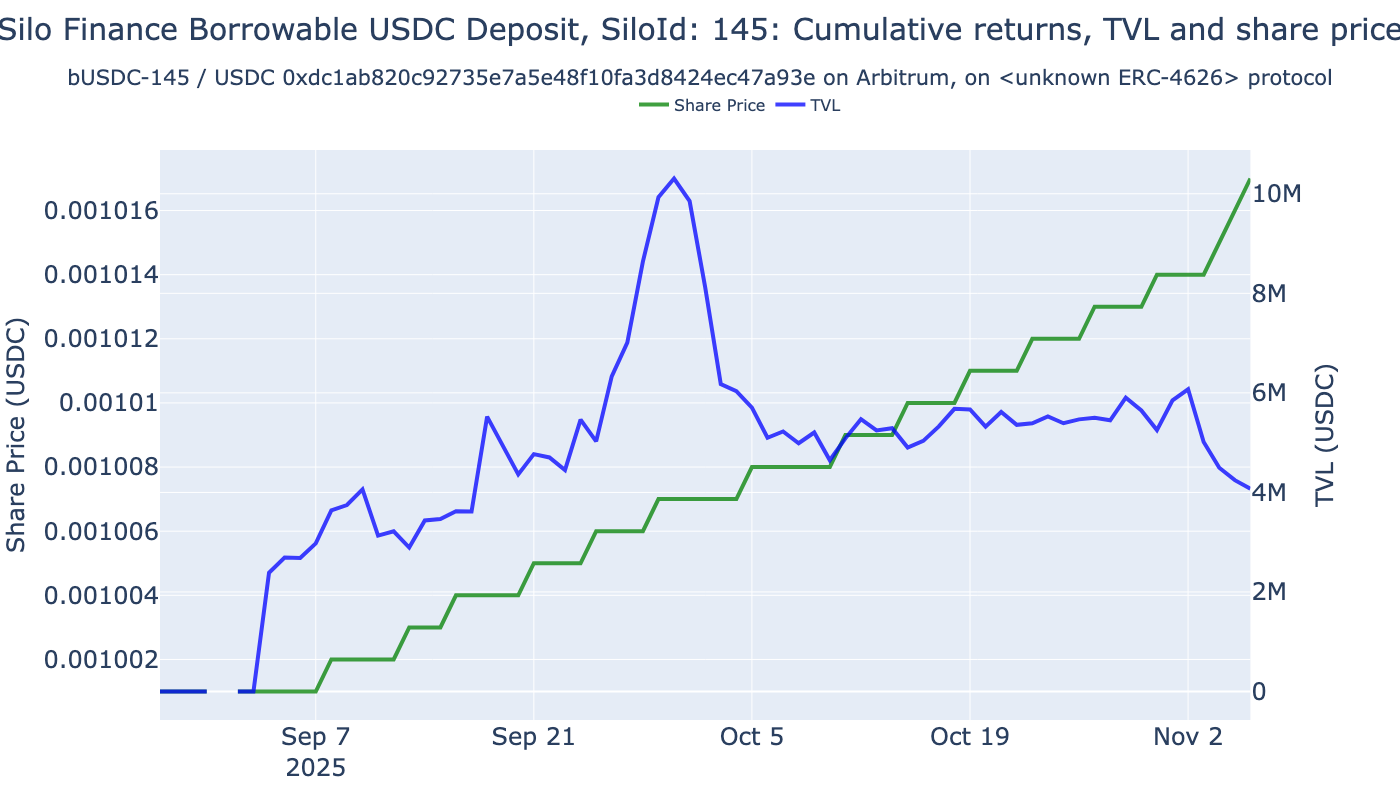

In [11]:
from eth_defi.research.vault_metrics import display_vault_chart_and_tearsheet
from eth_defi.vault.risk import VaultTechnicalRisk

examined_vaults_df = lifetime_data_filtered_df.loc[lifetime_data_filtered_df["risk"] != VaultTechnicalRisk.blacklisted]

interest_vault_specs = []

for idx, row in examined_vaults_df.head(10).iterrows():

    chain_id = row["id"].split("-")[0]
    address = row["id"].split("-")[1]
    vault_spec = VaultSpec(chain_id=int(chain_id), vault_address=address)

    # Used later
    interest_vault_specs.append(vault_spec)

    display_vault_chart_and_tearsheet(
        vault_spec,
        vault_db=vault_db,
        prices_df=prices_df,
        render=True,
    )


## Rolling returns comparison

- Show rolling returns of all picked vaults

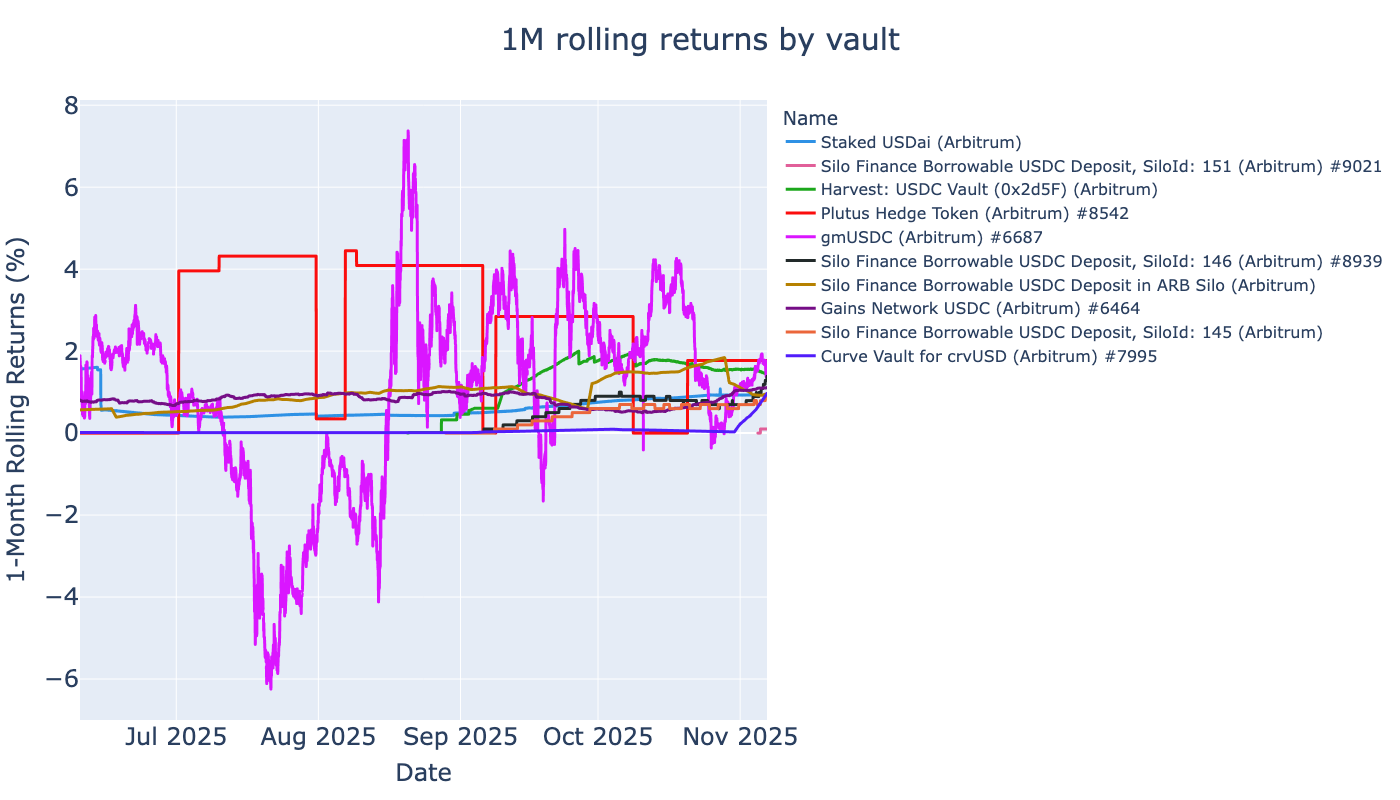

In [12]:
from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

rolling_returns_df = calculate_rolling_returns(
    prices_df,
    interesting_vaults=[spec.as_string_id() for spec in interest_vault_specs],
    clip_up=100,
)

# display(rolling_returns_df.head(3))

assert len(rolling_returns_df) > 0, "No rolling returns calculated"

fig = visualise_rolling_returns(rolling_returns_df)

fig.show()

## All vaults

- List all vaults found on this chain



In [13]:
min_tvl = 1_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
)

display(formatted_df)


Name  \
#                                                       
1   Silo Finance Borrowable USDC Deposit, SiloId: 151   
2                                  Plutus Hedge Token   
3                                              gmUSDC   
4                        Harvest: USDC Vault (0x2d5F)   
5   Silo Finance Borrowable USDC Deposit, SiloId: 146   
6                                  Gains Network USDC   
7                              Curve Vault for crvUSD   
8    Silo Finance Borrowable USDC Deposit in ARB Silo   
9                                        Staked USDai   
10  Silo Finance Borrowable USDC Deposit, SiloId: 145   
11                          Clearstar High Yield USDC   
12                          Nashpoint DeFi & RWA Fund   
13                                      USDC-2 yVault   
14                    Concrete USDC MultiSig Strategy   
15                           LazyVault_LowerRisk_USDC   
16                                              USDn2   
17                                  Gains Network DAI   
18                             Clearstar USDC Reactor   
19                                     Tokemak arbUSD   
20                             Curve Vault for crvUSD   
21                                   MEV Capital USDC   
22                            Yield Chasing Silo USDC   
23                               Yield Chasing crvUSD   
24                                         autoSUSDai   
25                                     Hyperithm USDC   
26                                 Yield Chasing USDC   
27                              K3 Capital USDai USDC   
28                                         Saving USX   
29                                     Dolomite: USDC   
30                                   Yearn Degen USDC   
31                                 Gauntlet USDC Core   
32                                     Dolomite: USDT   
33                                    Euler Earn USDC   
34                                   Prime Tether USD   
35                         Steakhouse High Yield USDC   
36                          Euler Arbitrum Yield USDC   
37                                Euler Arbitrum USDC   
38                                        Staked USDX   
39                             K3 Capital USDai USDT0   
40                                 Frontier Theo USDC   
41                                   Spark USDC Vault   
42                              Steakhouse Prime USDC   
43                                             gmUSDC   
44                             Curve Vault for crvUSD   
45                               DAMM Stablecoin Fund   
46                         Wrapped Aave Arbitrum USDT   
47                          Static Aave Arbitrum USDT   
48                                    Fluid Gho Token   
49                 Peapods Interest Bearing USDC - 25   
50                                Gauntlet USDC Prime   
51                                        dForce USDC   
52                         Static Aave Arbitrum USDCn   
53                        Wrapped Aave Arbitrum USDCn   
54                   Crypto.com Defi Wallet AAVE USDT   
55                          Wrapped Aave Arbitrum GHO   
56               Crypto.com Defi Wallet Compound USDC   
57                           LazyVault_LowerRisk_USDT   
58                                     Fluid USD Coin   
59                    Concrete USDC MultiSig Strategy   
60                   Crypto.com Defi Wallet AAVE USDC   
61                         fija Strategy USDC AaveOpt   
62                                   Fluid Tether USD   
63                                        Staked EURA   
64                             Curve Vault for crvUSD   
65                                          autoUSDai   
66                             Curve Vault for crvUSD   
67                             Curve Vault for crvUSD   
68                                           MS-sUSDe   
69                               Euler Arbitrum USDT0   
70